# Fingerprints
 
<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/colab_tutorials/blob/main/lecture4/fingerprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

### Fingerprints for text

One-hot encoder to fingerprint words

In [1]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

enc = OneHotEncoder()
words = ["horse", "rabbit", "giraffe", "horse", "rabbit"]
df = pd.DataFrame(words, columns=["word"])
display(df)

encoding = enc.fit_transform(df).toarray()
df["fps"] = encoding.tolist()
df

,word
0,horse
1,rabbit
2,giraffe
3,horse
4,rabbit


,word,fps
0,horse,"[0.0, 1.0, 0.0]"
1,rabbit,"[0.0, 0.0, 1.0]"
2,giraffe,"[1.0, 0.0, 0.0]"
3,horse,"[0.0, 1.0, 0.0]"
4,rabbit,"[0.0, 0.0, 1.0]"


Cosine similarity measures the similarity of vectors 

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

sim = cosine_similarity(np.vstack(df["fps"]))
pd.DataFrame(sim, columns=df.word.to_list(), index=df.word.to_list())

,horse,rabbit,giraffe,horse,rabbit
horse,1.0,0.0,0.0,1.0,0.0
rabbit,0.0,1.0,0.0,0.0,1.0
giraffe,0.0,0.0,1.0,0.0,0.0
horse,1.0,0.0,0.0,1.0,0.0
rabbit,0.0,1.0,0.0,0.0,1.0


Fingerprint of text by counting letters

In [17]:
# Function to count letters in a sentence
def letter_count(s):
    d = {}  # dict to return
    for i in s:  # iterate characters
        d[i] = d.get(i, 0) + 1
    return d


words = ["horse", "rabbit", "giraffe", "horse", "rabbit"]
print("Fingerprints")
counts = [letter_count(xx) for xx in words]
counts

Fingerprints


[{'h': 1, 'o': 1, 'r': 1, 's': 1, 'e': 1},
 {'r': 1, 'a': 1, 'b': 2, 'i': 1, 't': 1},
 {'g': 1, 'i': 1, 'r': 1, 'a': 1, 'f': 2, 'e': 1},
 {'h': 1, 'o': 1, 'r': 1, 's': 1, 'e': 1},
 {'r': 1, 'a': 1, 'b': 2, 'i': 1, 't': 1}]

### Fingerprints for chemical structures

C(c1ccccc1)(C[*])[*]


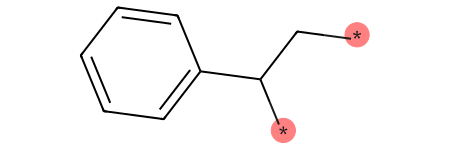

In [5]:
# Install a pip package directly from GitHub is also possible with the following command
#!pip install 'psmiles[polyBERT]@git+https://github.com/Ramprasad-Group/psmiles.git'

from psmiles import PolymerSmiles as PS

# PSMILES string of polystyrene
polystyrene = "C(c1ccccc1)(C[*])[*]"
ps = PS(polystyrene)
ps

In [6]:
# Fingerprint of PS
ps.fingerprint()

array([0, 1, 0, ..., 0, 0, 0])

Action:
- Compute the fingerprint  of all these polymers in a loop

In [8]:
import pandas as pd


psmiles_strings = [
    "*CC*",
    "*CCO*",
    "*CC(C)*",
    "*CC(CC)*",
]

Action: 
- Measure similarity using `pairwise_distances` function of sklearn
- Return as pandas dataframe

In [ ]:
# Yeah, sklearn again! We use the pairwise_distance
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Use `euclidean` distance d = sqrt((p1-q1)**2 + (p2-q2)**2 + ...)
# pairwise_distances( ...  metric="euclidean")


psmiles,*CC*,*CCO*,*CC(C)*
psmiles,,,
*CC*,0.000000,3.605551,3.000000
*CCO*,3.605551,0.000000,4.472136
*CC(C)*,3.000000,4.472136,0.000000


Action:

- Create a one-hot encoded fingerprints of the PSMILES strings